In [1]:
import os

os.chdir(r'C:\users\caroline.OHagan\Downloads')

In [2]:
%run ./startup_file.ipynb #run startup file and install libraries if necessary

# SEASCAPES_COLORBAR

## Author: caroline OHagan

##### *Last run on 2024-07-26*

In [3]:
import wget

In [4]:
os.chdir(data_dir) #cd to data directory 
#create new project data folder 
proj_data = '/SST' #name of project
data_dir_fold = data_dir+proj_data #path for new folder 
isexist = os.path.exists(data_dir_fold) #check if path exists 
#print(isexist)
if str(isexist) == 'False': #if path doesn't exist already, make it
    os.mkdir(data_dir_fold)
start_date = '20230101' #(yyyy-mm-dd format)
end_date = '20231231'
url = ''.join(['https://comet.nefsc.noaa.gov/erddap/griddap/noaa_coastwatch_acspo_v2_reanalysis.nc?sea_surface_temperature%5B('+start_date+'T12:00:00Z):1:('+end_date+'T12:00:00Z)%5D%5B(34.40918):1:(46.362305)%5D%5B(-63.585942):1:(-77.681645)%5D'
               ]) 

def url2date(url, nu): #write function to grab the start and end dates of the data inquiry to use them for naming our data file
    dat = url.split('(')
    s_dat = [s for s in dat if nu in s]
    s_dat = s_dat[0].split('T')
    s_dat = s_dat[0].split('-')
    s_dat = s_dat[0]+s_dat[1]+s_dat[2]
   
    return(s_dat)

In [5]:
proj_data = '/SEASCAPES' #name of project
data_dir_fold = data_dir+proj_data #path for new folder 
os.chdir(data_dir_fold)
fname = "/DD8_" + start_date + '_'+ end_date + ".nc" #create unique filename 
#follow kims naming structure 
#DD8_yyyymmdd_yyyymmdd start end dates #write function to get that parts of URL 
file = data_dir_fold+fname
ds_source = xr.open_dataset(file, decode_cf=True) #open nc file 
ds_source #inspect xarray dataset

ds_target = xr.open_dataset(file, decode_cf=True) #open nc file 
ds_target #inspect xarray dataset
eightday=ds_source.rolling(time=8, center=True, min_periods=1).mean()
import xarray_regrid
ds_source = eightday.regrid.linear(ds_target) #regrid data 

In [6]:
os.chdir(data_dir) #cd to data directory 
#create new project data folder 
proj_data = '/CHLOROPHYLL' #name of project
data_dir_fold = data_dir+proj_data #path for new folder 
isexist = os.path.exists(data_dir_fold) #check if path exists 
#print(isexist)
if str(isexist) == 'False': #if path doesn't exist already, make it
    os.mkdir(data_dir_fold)

os.chdir(data_dir_fold) #go to project data folder
os.getcwd() #check if in the correct folder

'C:\\users\\caroline.OHagan\\Documents\\INTERN_PROJECT_2024\\DATA\\CHLOROPHYLL'

In [7]:
#load seascpaes data from file 
os.chdir(data_dir) #cd to SST directory
proj_data = '\SEASCAPES'
data_dir_fold = data_dir+proj_data #path for new folder 
isexist = os.path.exists(data_dir_fold) #check if path exists 
#print(isexist)
if str(isexist) == 'False': #if path doesn't exist already, make it
    os.mkdir(data_dir_fold)

os.chdir(data_dir_fold) #go to project data folder
os.getcwd() #check if in the correct folder
seascapes = xr.open_dataset(file, decode_cf=True) #open nc file 
seascapes #inspect xarray dataset

<xarray.Dataset>
Dimensions:    (time: 47, latitude: 240, longitude: 283)
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2024-01-01T12:00:00
  * latitude   (latitude) float32 34.42 34.47 34.53 34.58 ... 46.28 46.33 46.38
  * longitude  (longitude) float32 -77.68 -77.62 -77.57 ... -63.67 -63.62 -63.58
Data variables:
    CLASS      (time, latitude, longitude) float32 ...
    P          (time, latitude, longitude) float32 ...
Attributes: (12/38)
    acknowledgement:            The U.S. MBON projects are funded under the N...
    cdm_data_type:              Grid
    contact:                    Joaquin.Trinanes@noaa.gov/mkavanau@ceoas.oreg...
    Conventions:                COARDS, CF-1.4, Unidata Dataset Discovery v1.0
    creator_email:              Joaquin.Trinanes@noaa.gov/mkavanau@ceoas.oreg...
    creator_type:               group
    ...                         ...
    summary:                    Biogeographic framework. Space and time class...
    time_coverage_duration:     P0Y1M0DT0H0M0S
    time_coverage_end:          2024-01-01T12:00:00Z
    time_coverage_start:        2023-01-01T12:00:00Z
    title:                      8_Day Global Seascapes
    Westernmost_Easting:        -77.675

In [8]:
num_files = len(seascapes.CLASS.values)

In [9]:
# CREATE DICTIONARIES OF MASKS
masks = {}
mask_one = []

for y in range(1,34):
    mask_one = []
    for x in range(num_files):
        cn= np.ma.masked_where(seascapes.CLASS.values[x]==y, seascapes.CLASS.values[x])
        mask_one.append(cn)
        masks.update({y: mask_one})

In [10]:
# CREATE DICTIONARIES OF PERCENTS
perce = []
percent = {}
for y in range(1,34):
    perce = []
    for x in range(num_files):
        #tt = masks[x][y] == y
        true_val = np.count_nonzero(masks[y][x].mask == True)
        #true_val = np.count_nonzero(tt == True)
        total_nonnan = np.count_nonzero(~np.isnan(masks[y][x].data)) #total number of pixels NON NAN
        perc = true_val / total_nonnan * 100  #PUT INTO LOOP AND FIND PERC FOR EACH DATE AND PLOT EACH DAT
        perce.append(perc)
        percent.update({y:perce})

In [ ]:
# CREATE DICTIONARIES OF PERCENTS FOR NAN DATA
percenan = []
percentnan = {}
for y in range(1,34):
    percenan = []
    for x in range(num_files):
        trueval = np.count_nonzero(mask[x].mask == True)
        falseval = np.count_nonzero(mask[x].mask == False)
        totalwnan = trueval+falseval
        perc_nan = trueval / totalwnan * 100  #PUT INTO LOOP AND FIND PERC FOR EACH DATE AND PLOT EACH DAT
        percenan.append(perc_nan)
        percentnan.update({y:percenan})

In [12]:
#this turns the datetimes into strings and splits them into yyyy-mm-dd for labeling the date axis 
#add this BEFORE plot
d8s = []
month = []

for x in range(len(seascapes.time.data)):
    d88 = str(seascapes.time.data[x])
    d88 = d88.split('T')
    d8s.append(d88[0])
    M = seascapes.time[x].dt.strftime('%B').item()
    month.append(M)

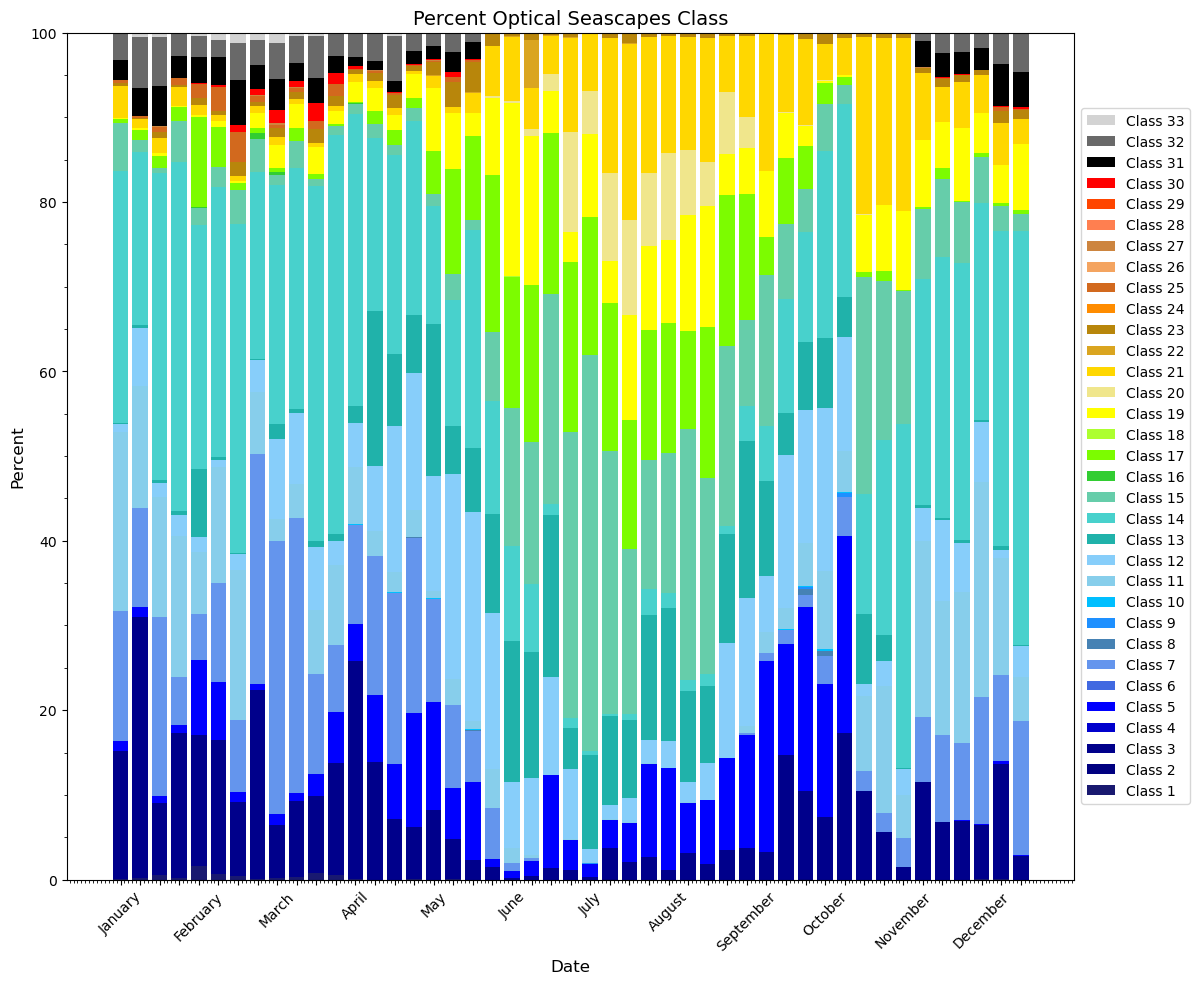

In [13]:
xi = list(range(len(seascapes.time)))
values = np.array([percent[1], percent[2], percent[3], percent[4],
                   percent[5], percent[6], percent[7], percent[8], percent[9], 
                   percent[10], percent[11], percent[12], percent[13], percent[14], 
                   percent[15], percent[16], percent[17], percent[18], percent[19], 
                   percent[20], percent[21], percent[22], percent[23], percent[24], 
                   percent[25], percent[26], percent[27], percent[28], percent[29], 
                   percent[30], percent[31], percent[32], percent[33]])

colors = ["midnightblue","navy","darkblue","mediumblue", "blue", "royalblue", 'cornflowerblue','steelblue','dodgerblue','deepskyblue','skyblue','lightskyblue','lightseagreen','mediumturquoise','mediumaquamarine','limegreen','lawngreen','greenyellow','yellow',
         'khaki','gold','goldenrod','darkgoldenrod','darkorange', 'chocolate','sandybrown','peru','coral','orangered','red','black','dimgrey', 'lightgray']


fig = plt.figure(figsize=(13, 11)) 
for i in range(values.shape[0]):

    p = plt.bar(xi, values[i], bottom = np.sum(values[:i], axis = 0), color = colors[i],label='Class' + ' ' + str(i+1))
    plt.legend(bbox_to_anchor=(1.05, 1.0), ncol=2)
    #for x in range(len(p.datavalues)):
        #if p.datavalues[x] > 20:
            #plt.bar_label(p, label_type='center', fontsize = 10)
        #else:
            #continue
    

    plt.xlabel("Date", fontsize=12)
    plt.ylabel('Percent', fontsize=12)
    plt.title('Percent Optical Seascapes Class', fontsize=14)
    plt.tick_params(axis='x', labelsize=10)
    plt.xticks(xi, month, rotation=45, fontsize=10) #add correct labels
    plt.minorticks_on()
    plt.legend(reverse=True, loc='center left', bbox_to_anchor=(1, 0.5))
    labels = []
    for i in range(len(xi)): 
        if i % 4 == 0: 
            labels.append(month[i])
        else: 
            labels.append("")

    plt.xticks(ticks=xi,labels=labels)
    


In [ ]:
#plot all dates on top of each other for ONE class
from matplotlib import colors as c
start_date = '2023-07-04' #(yyyy-mm-dd format)
end_date = '2023-07-28'

cMap = c.ListedColormap(['w','b']) #define colormap (masked values will be white, presence will be in blue)

import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely.ops import cascaded_union

mask = []
classnum = 13
for x in range(num_files):
    cn= np.ma.masked_where(seascapes.CLASS.values[x]==classnum, seascapes.CLASS.values[x])
    mask.append(cn)

for x in range(num_files):
    fig = plt.figure(figsize=(10, 7)) #set figure size
    map_projection = cartopy.crs.PlateCarree() #set map projection
    ax = plt.axes(projection=map_projection) 
    try:
        ax.pcolormesh(seascapes.longitude, seascapes.latitude, mask[x].mask, cmap=cMap) #set variables to plot
    except ValueError:
        pass
        
    ax.coastlines()
    bathym = cfeature.NaturalEarthFeature(name='bathymetry_K_200', scale='10m', category='physical')
    bathym = cascaded_union(list(bathym.geometries()))
    ax.add_geometries(bathym, facecolor='none', edgecolor='black', crs=ccrs.PlateCarree())
    plt.title('Seascapes Class' +  ' '+ str (classnum)  + str(seascapes.time[x].values))

In [ ]:
seascapes.time

In [15]:
nu = [] #ID of unique classes found in each image
idx = [] #counts of each class 
num_clas = [] #number of classes 
for x in range(num_files):
    n, id = np.unique(seascapes.CLASS.values[x], return_counts=True)  
    nc = len(n)
    idx.append(id) #add to idx as looping through files
    nu.append(n)
    num_clas.append(nc)

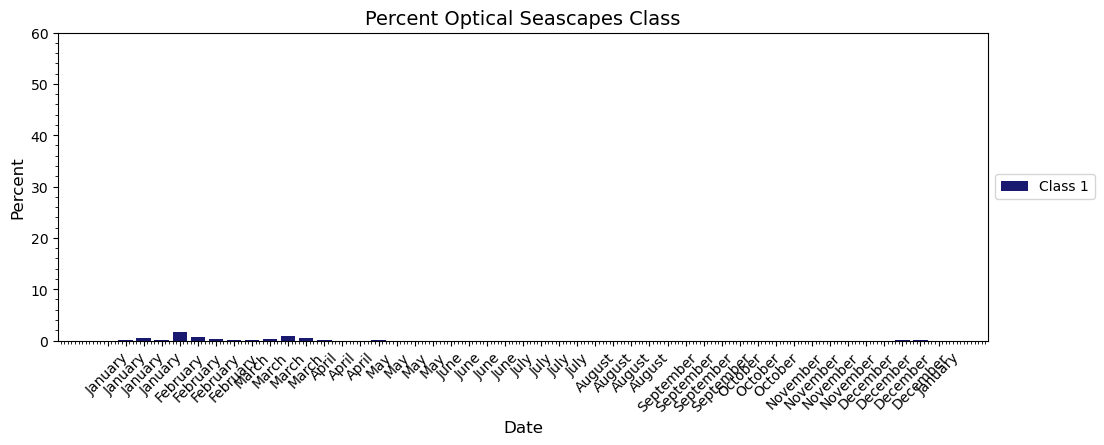

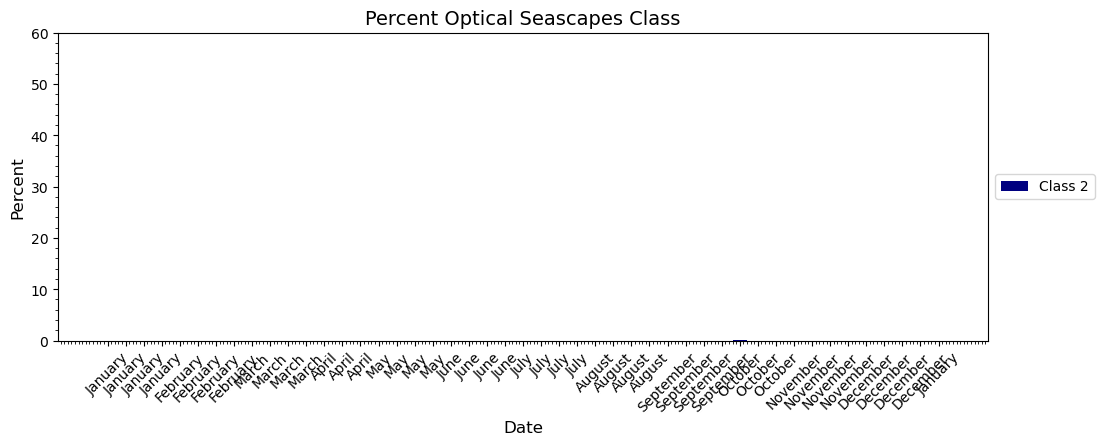

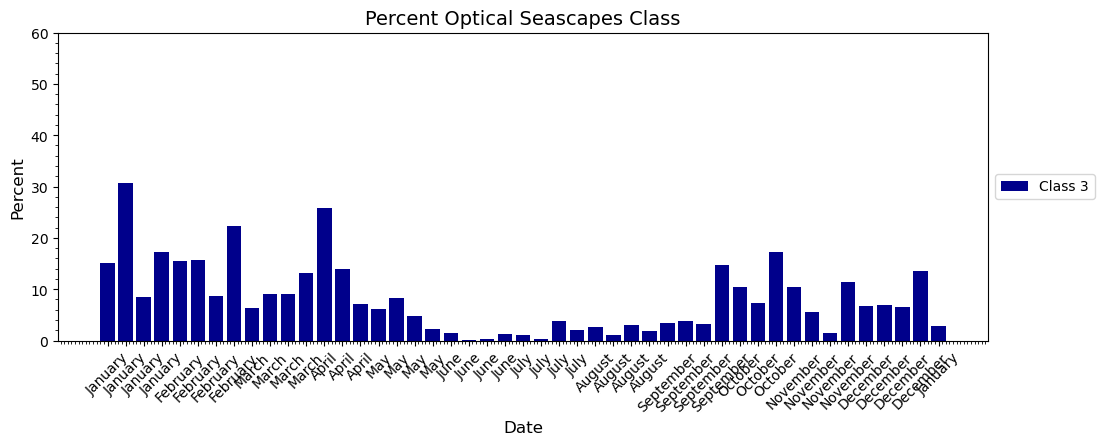

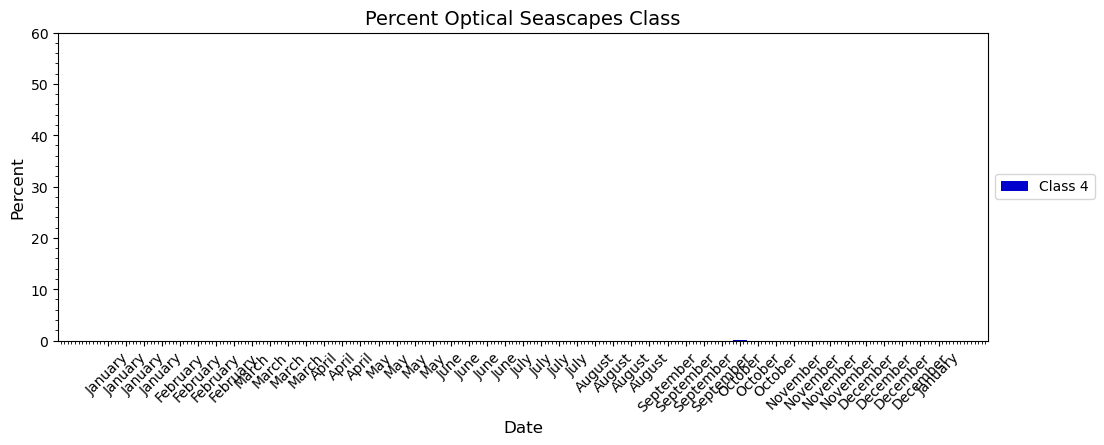

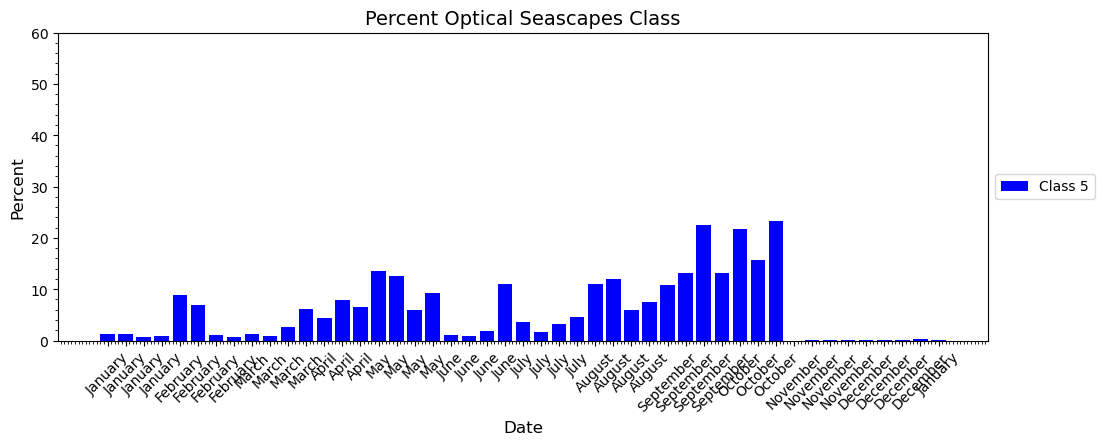

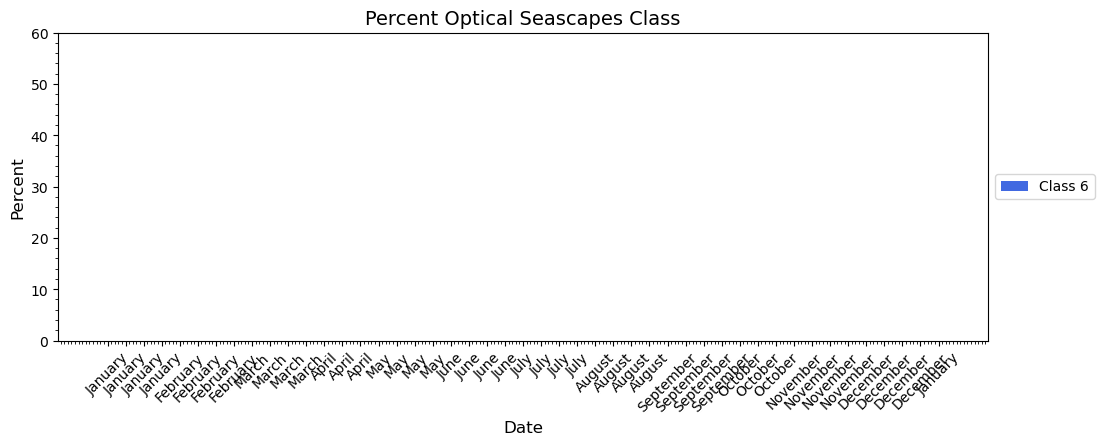

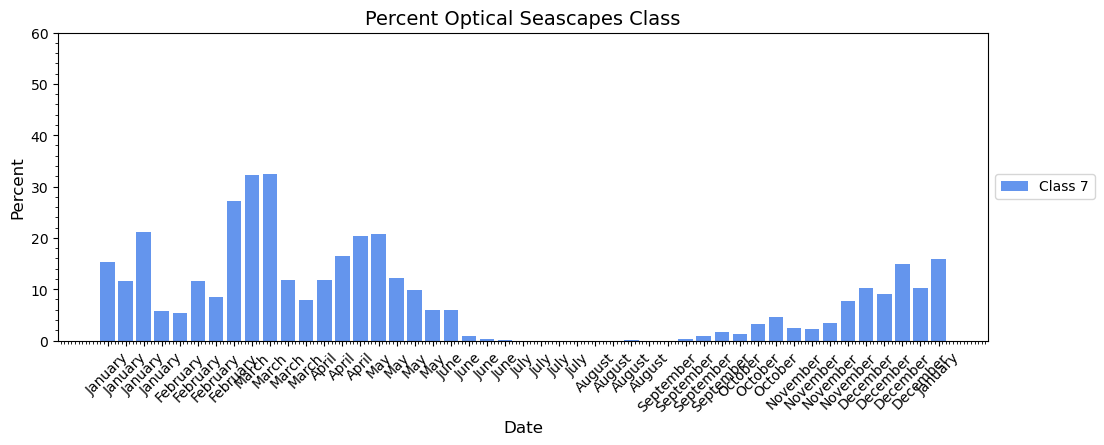

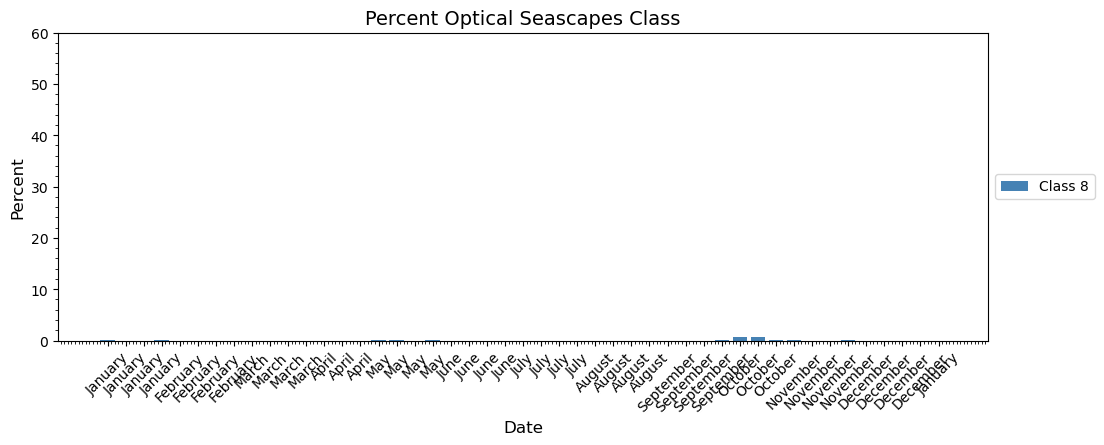

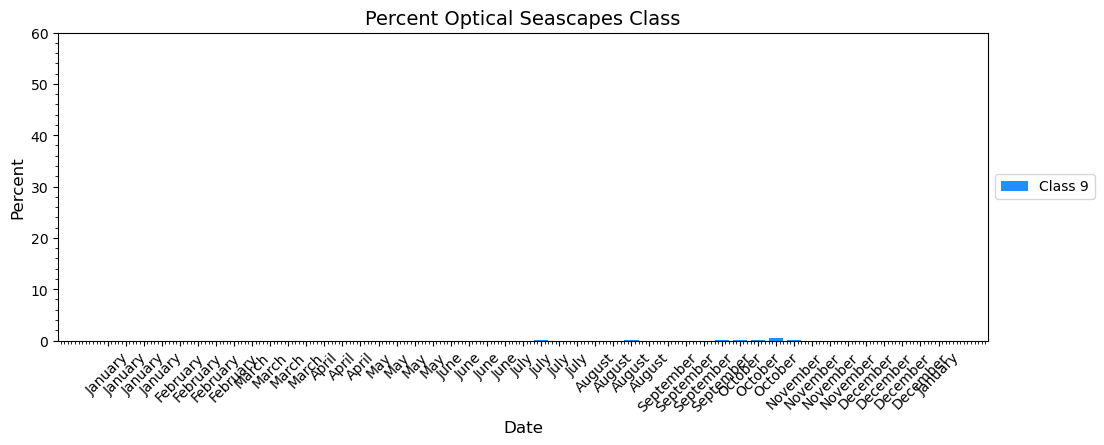

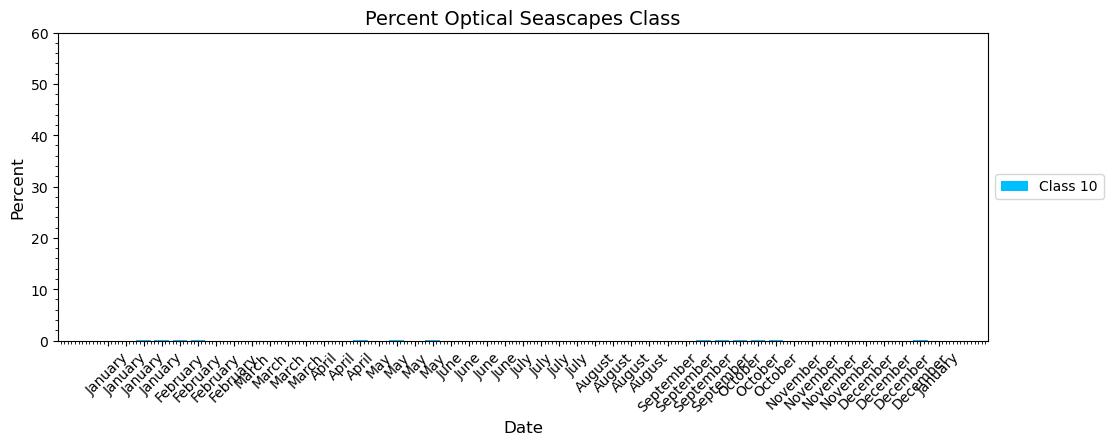

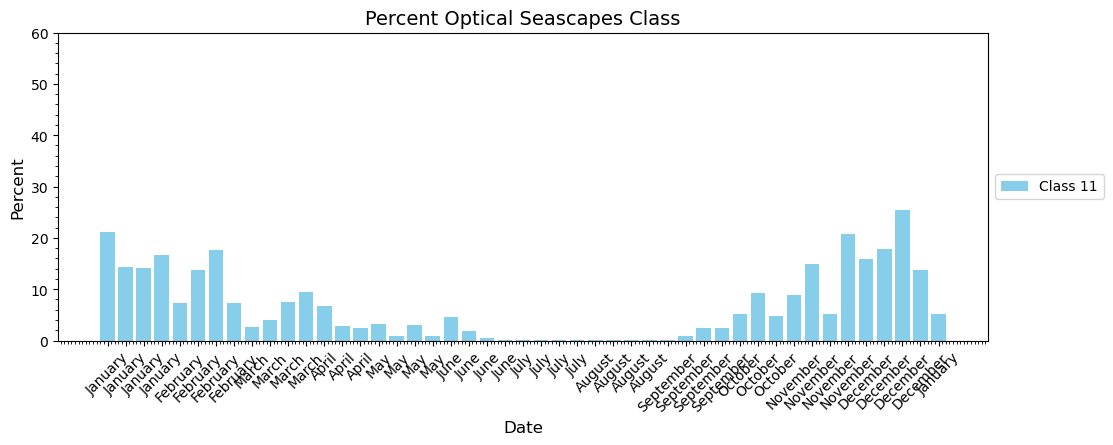

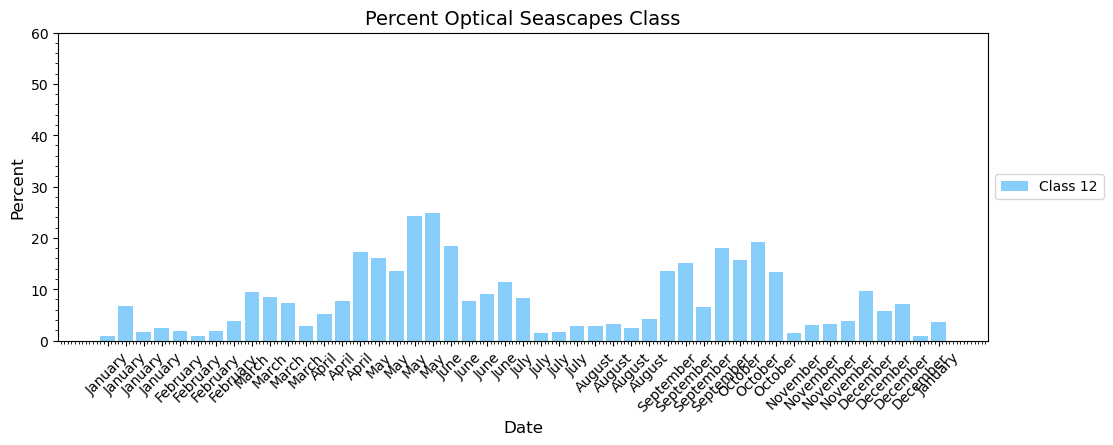

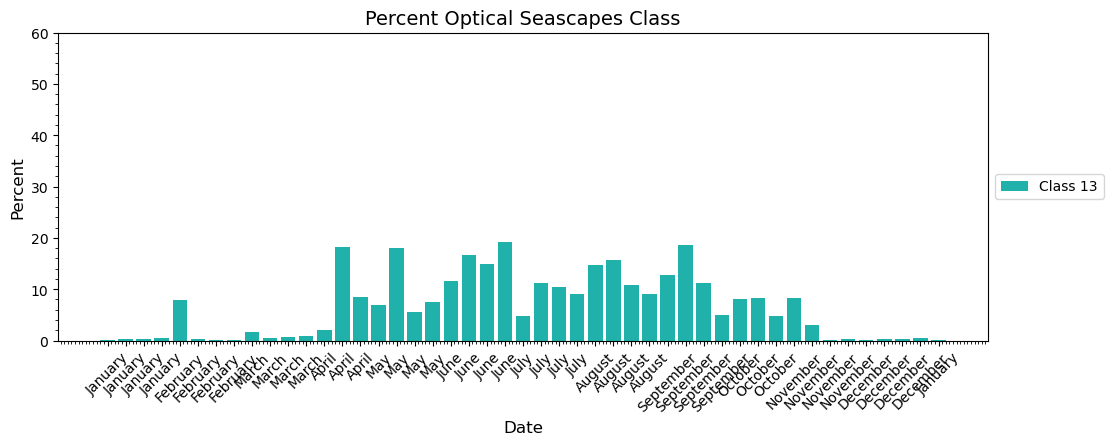

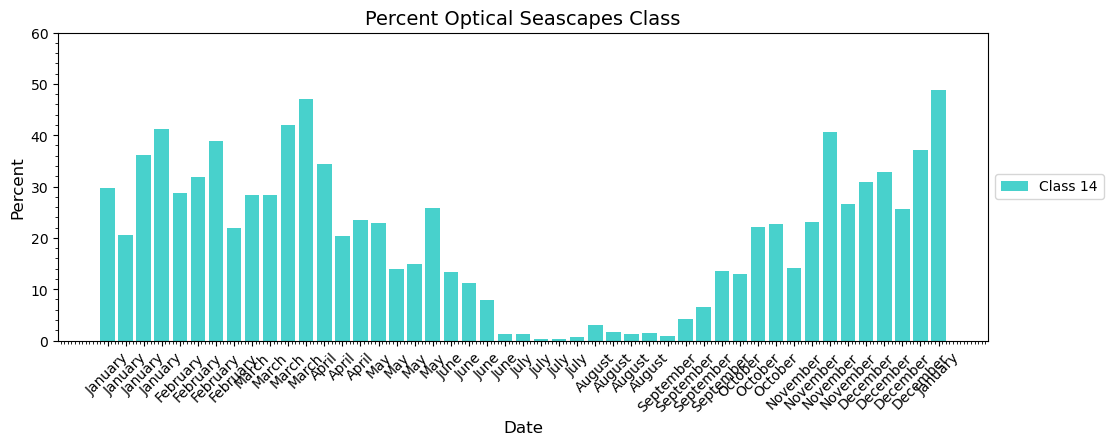

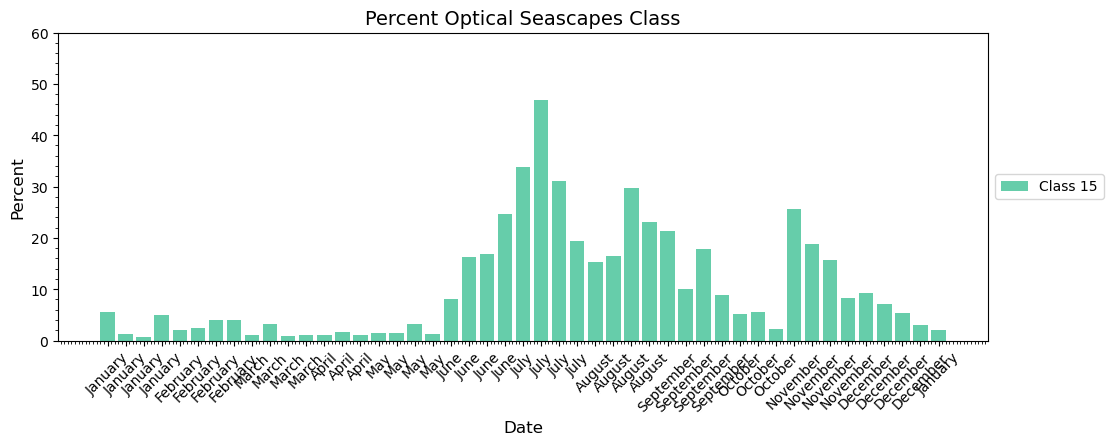

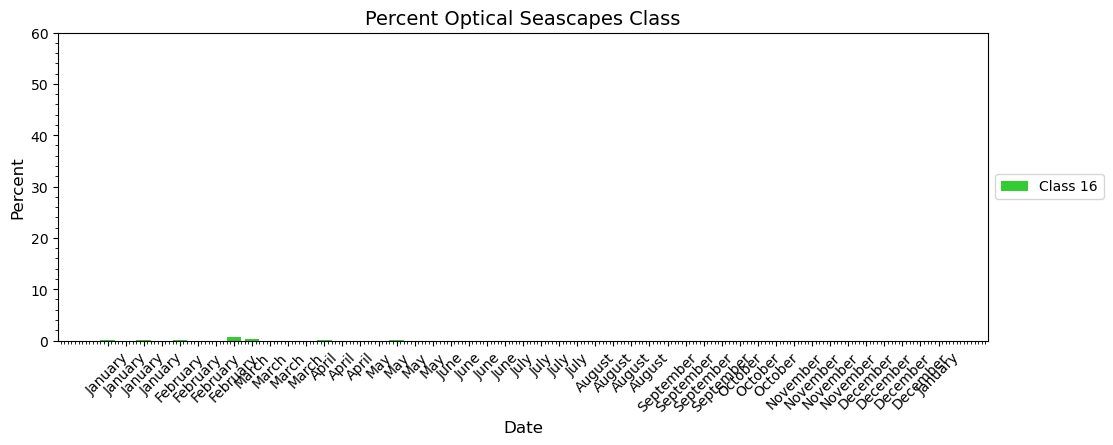

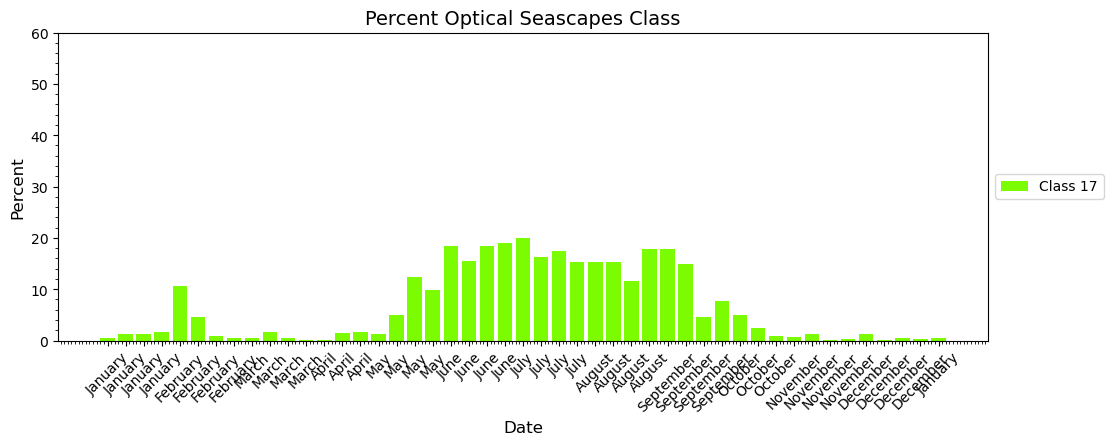

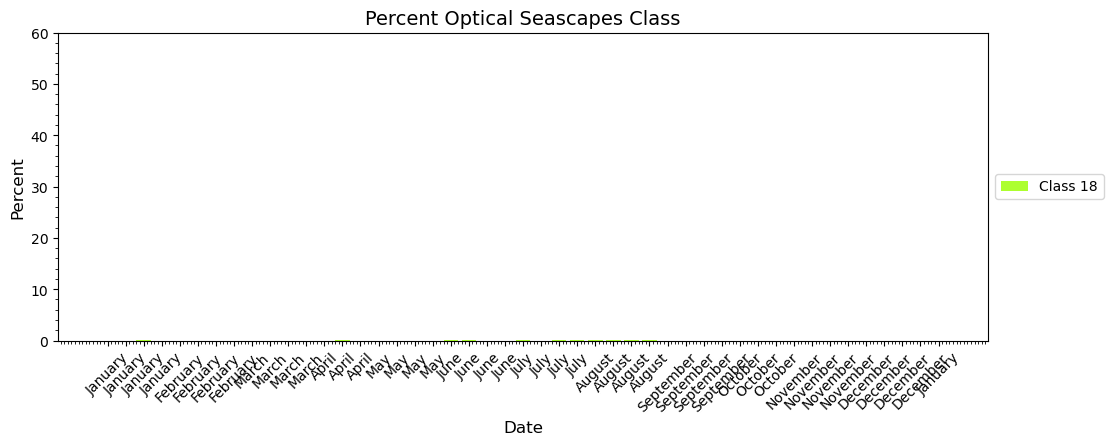

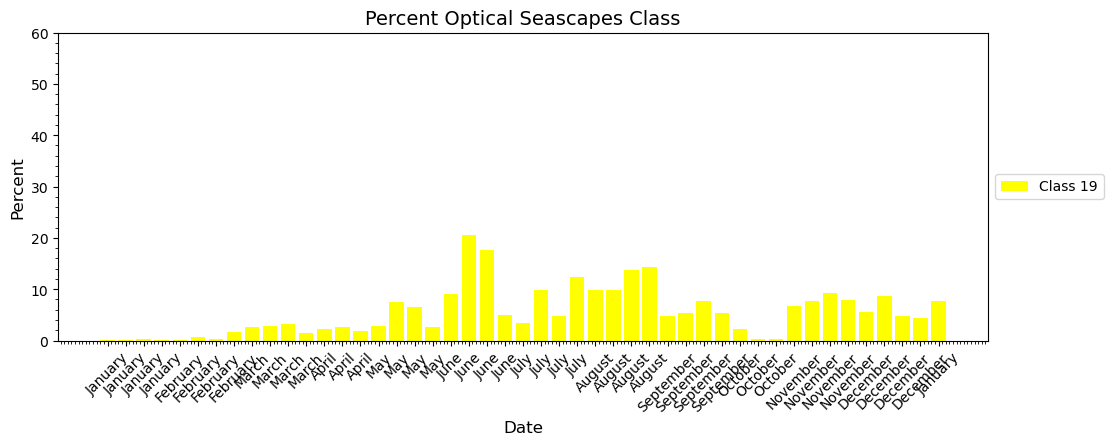

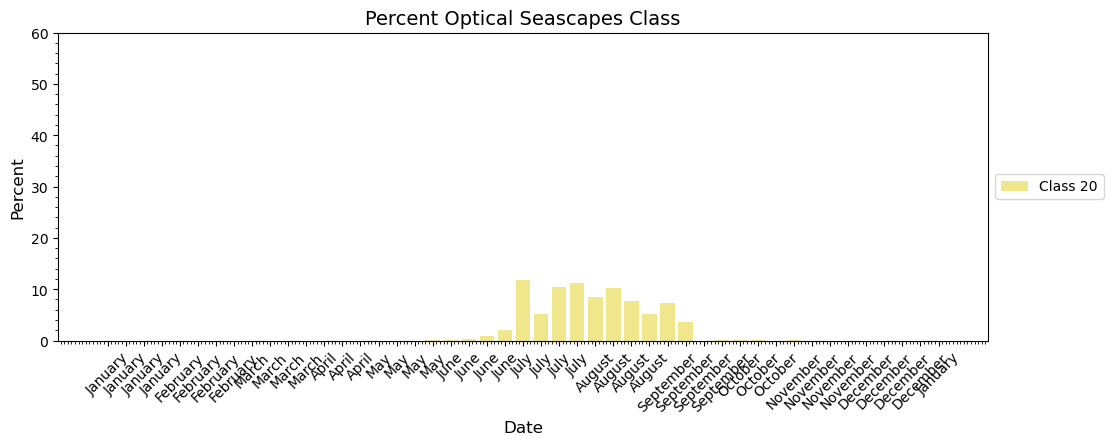

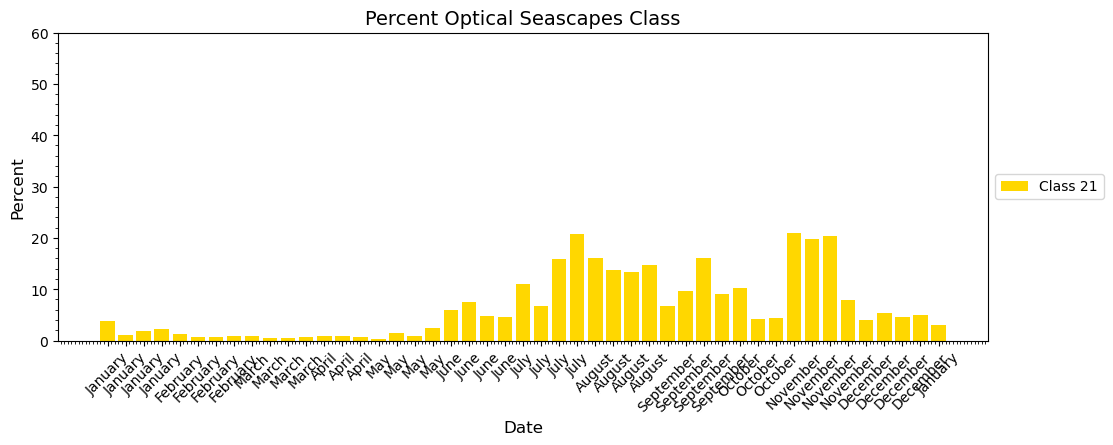

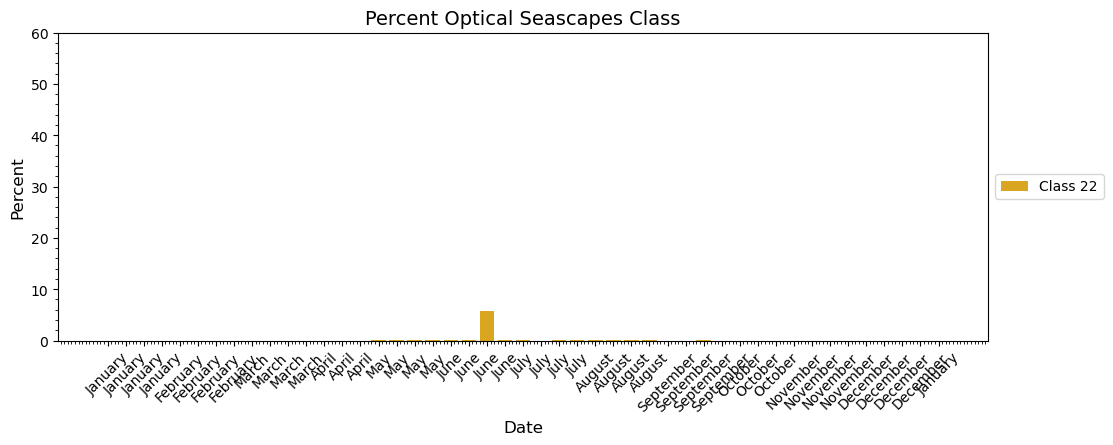

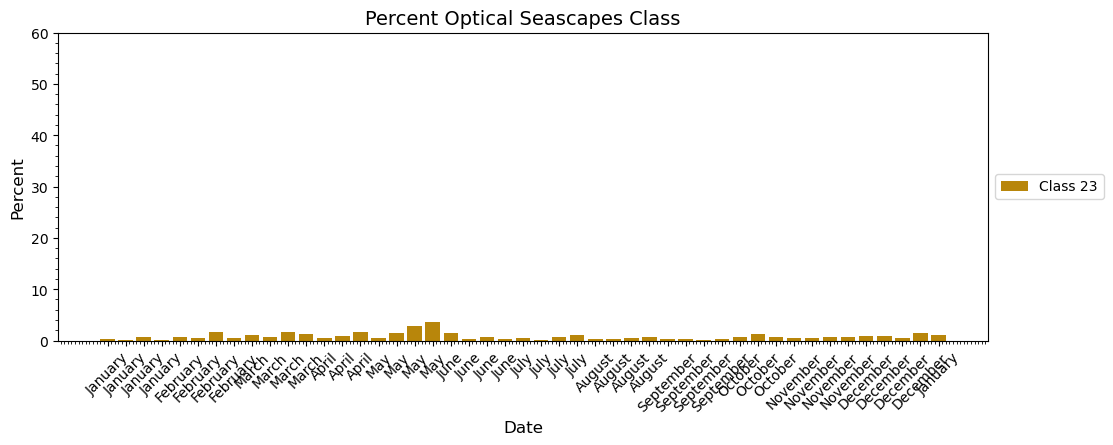

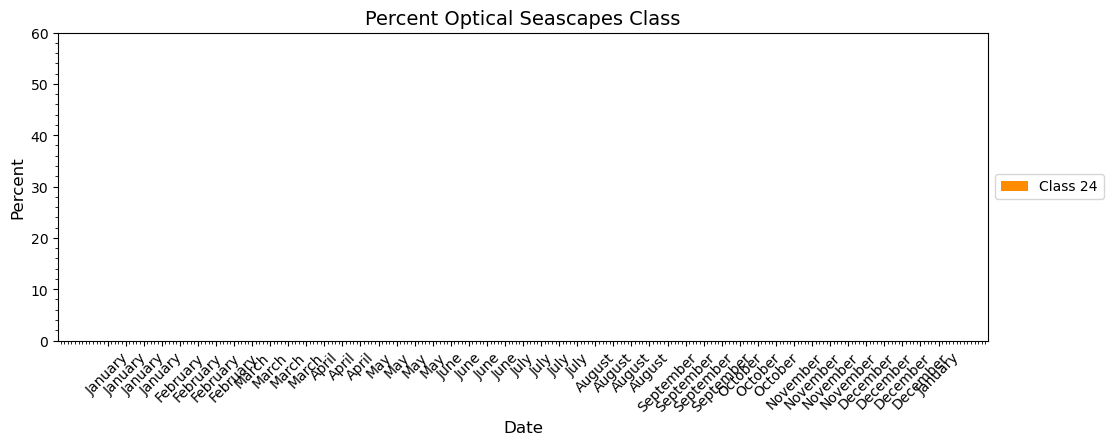

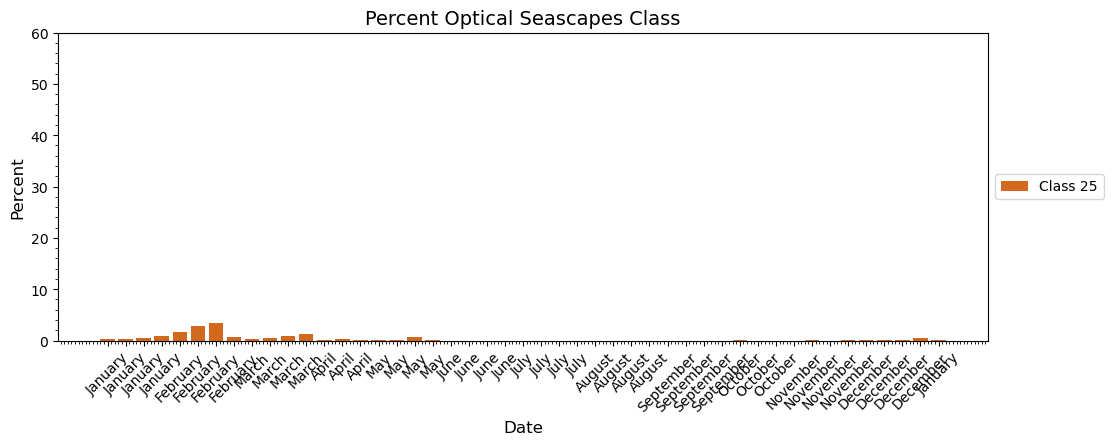

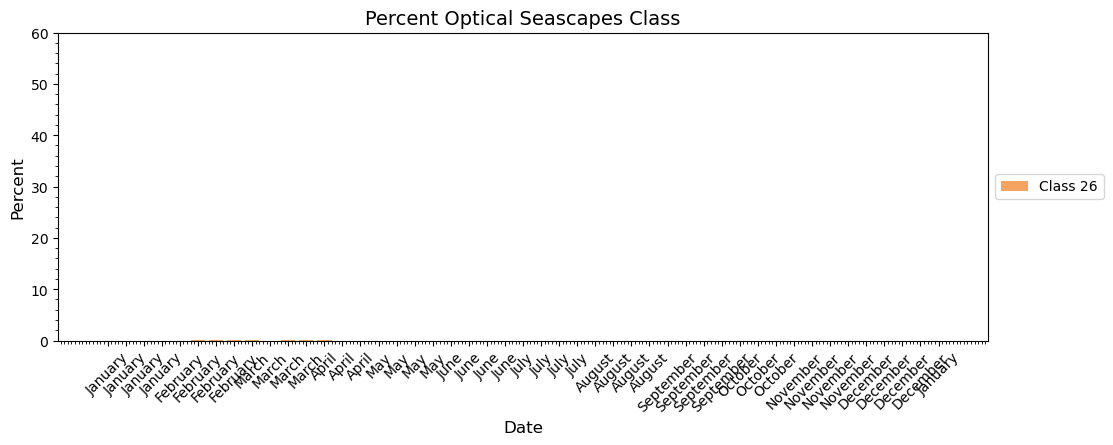

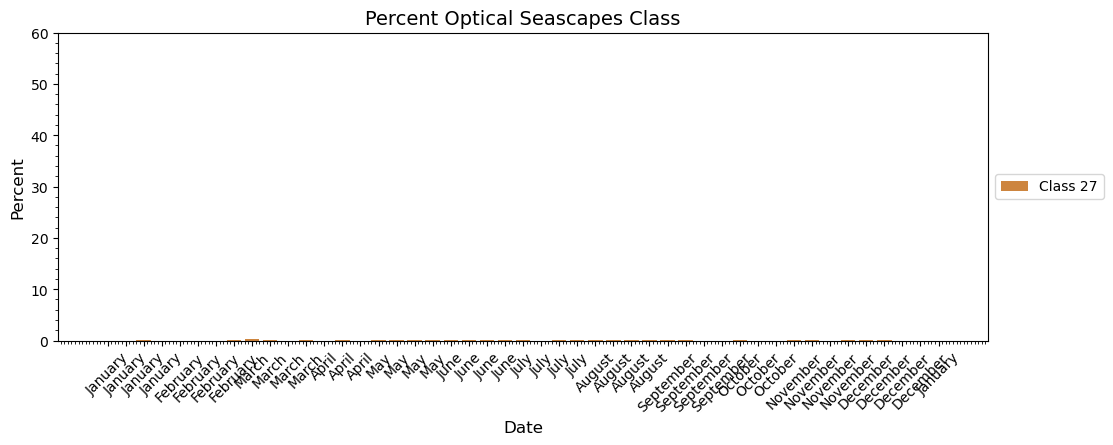

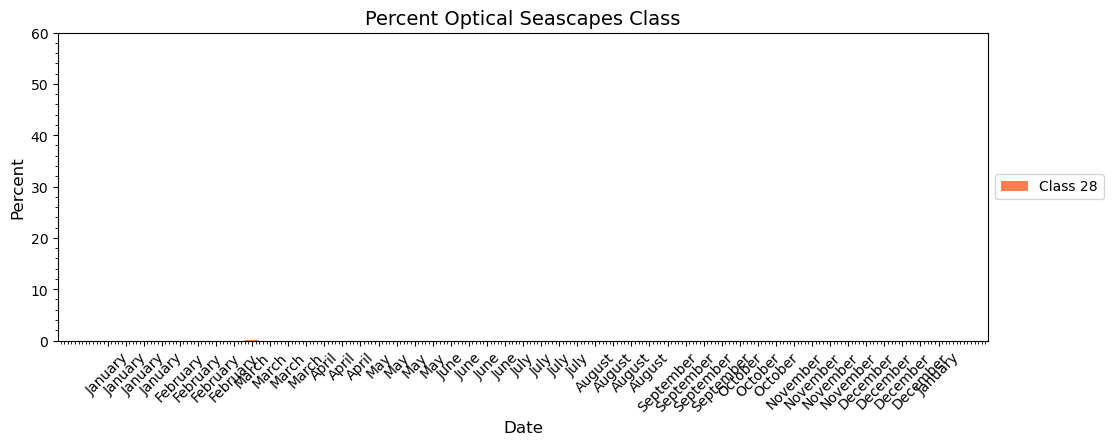

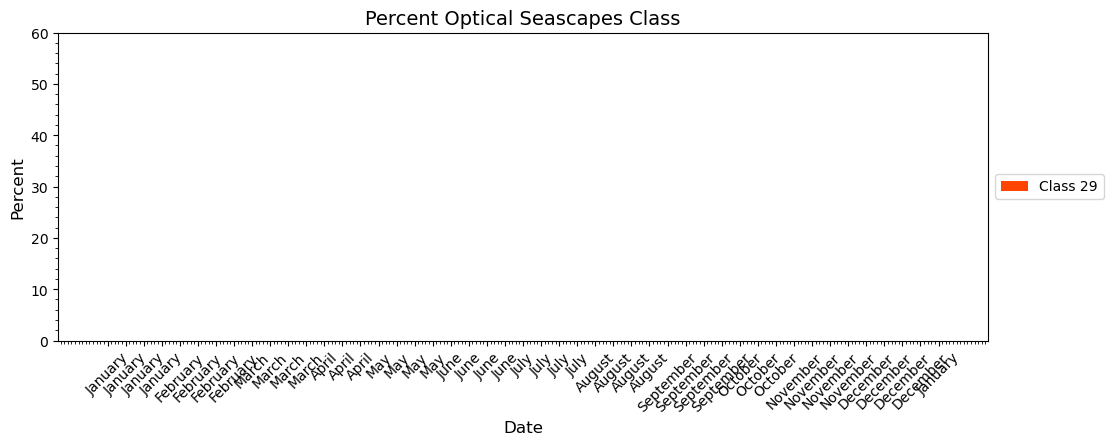

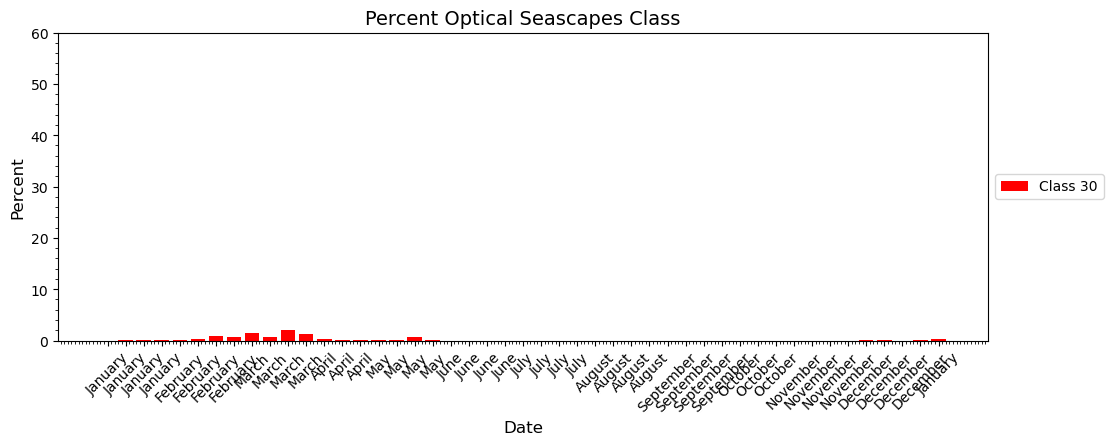

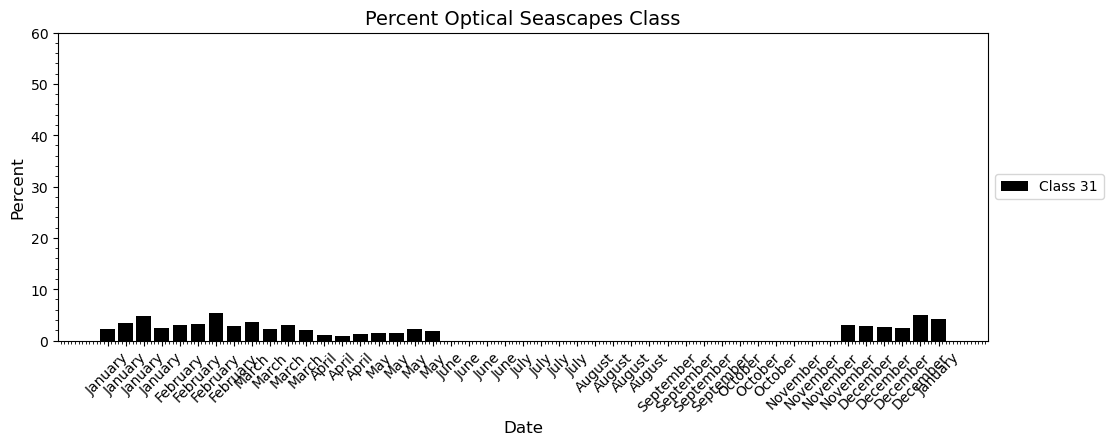

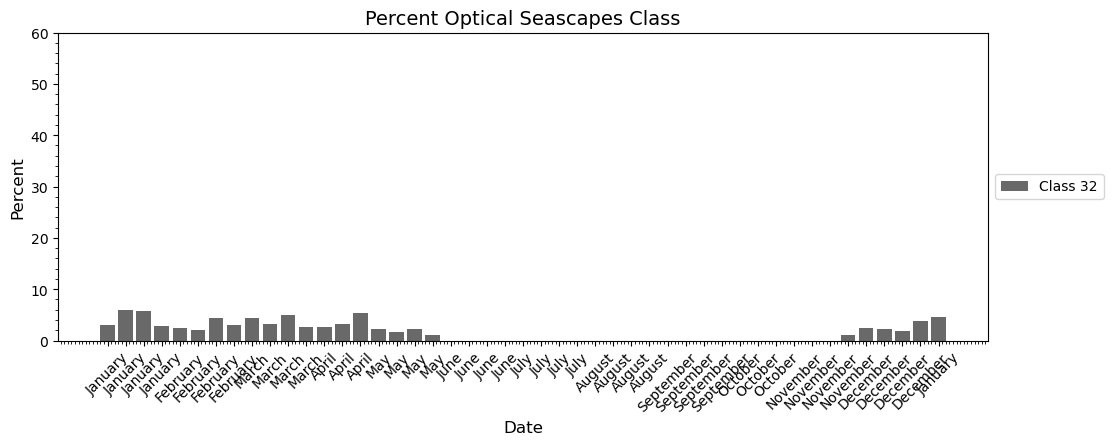

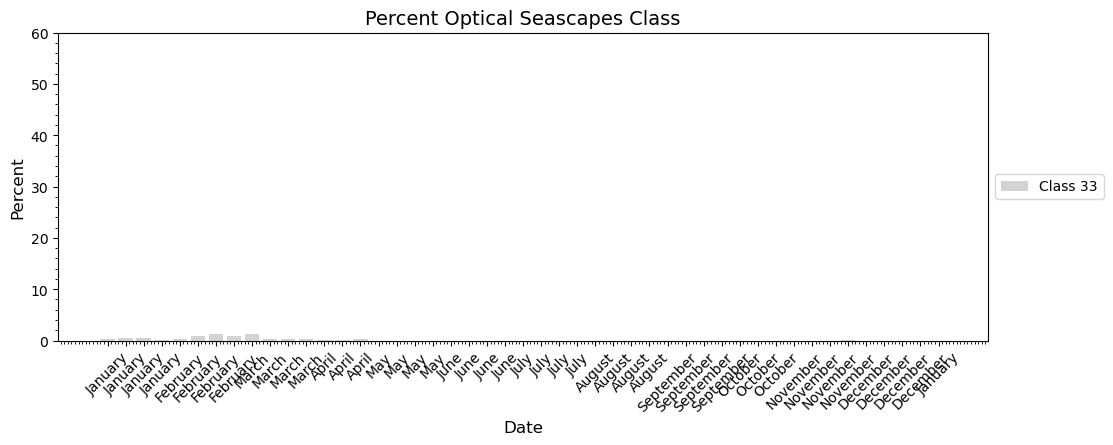

In [16]:
for i in range(1,34):
    plt.figure(figsize=(12, 4))
    p = plt.bar(xi, percent[i], color = colors[i-1],label='Class' + ' ' + str(i)) #set variables to plot 
    plt.xlabel("Date", fontsize=12)
    plt.ylabel('Percent', fontsize=12)
    plt.title('Percent Optical Seascapes Class', fontsize=14)
    plt.tick_params(axis='x', labelsize=10)
    plt.xticks(xi, month, rotation=45, fontsize=10) #add correct labels
    plt.ylim(0,60)
    #if values.shape[0]<5:
        #plt.bar(p)
    #else:
        #continue
    plt.minorticks_on()
    plt.legend(reverse=True, loc='center left', bbox_to_anchor=(1, 0.5))
    #labels = []
    #for i in range(len(xi)): 
        #if i % 4 == 0: 
            #labels.append(month[i])
        #else: 
            #labels.append("")

    #plt.xticks(ticks=xi,labels=labels)

In [17]:
jet = ["blue", "#007FFF", "cyan", "#7FFF7F",
       "yellow", "#FF7F00", "red", "#7F0000"]

In [ ]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely.ops import cascaded_union
for x in range(num_files):
    fig = plt.figure(figsize=(10, 7)) #set figure size
    map_projection = cartopy.crs.PlateCarree() #set map projection
    ax = plt.axes(projection=map_projection) 

    cm = LinearSegmentedColormap.from_list('my_jet', jet, N=33) #call colormap
    im = ax.pcolormesh(seascapes.longitude, seascapes.latitude,seascapes.CLASS[x,:,:], cmap = cm, vmin=0, vmax=33) #set variables to plot
    ax.coastlines()
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.feature as cfeature
    import cartopy.crs as ccrs
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from shapely.ops import cascaded_union
    bathym = cfeature.NaturalEarthFeature(name='bathymetry_K_200', scale='10m', category='physical')
    bathym = cascaded_union(list(bathym.geometries()))
    ax.add_geometries(bathym, facecolor='none', edgecolor='black', crs=ccrs.PlateCarree())

    ax.set_xticks(np.linspace(-78, -63.4, 5), crs=map_projection) #set latitude bounds 
    ax.set_yticks(np.linspace(34.3, 47, 5), crs=map_projection) #set longitude bounds
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    cb = plt.colorbar(im, label='Class number',) #colorbar title 
    tick_locator = ticker.MaxNLocator(nbins=33) #set 33 ticks to colorbar (one for each seascape class) 
    cb.locator = tick_locator
    cb.update_ticks()
    plt.title("Seascape CLASS:" + ' '+seascapes.time[x].dt.strftime('%Y-%m-%d').item()) #add title to plot

In [ ]:
!pip install webcolors

In [ ]:
import webcolors

In [ ]:
new_cmap = [(0,0,152),(0,14,161),(0,29,169), (0,43,177), (0,58,186),(0,72,194),(0,86,201), (0,101,210), (0,115,218), (0,130,226), (0,144,235), (0,159,244), (16,177,217), (51,187,178), (85,197,137), (120,207,99), (154,217,60), (155,217,60), (189,226,21), (210,225,0), (215,211,0), (218,200, 0), (222, 189, 0), (227,187,0), (231,166,0), (234,154,0), (238,143,0), (243,130,0), (246,120,0), (251,108,0), (254,95,0), (50,50,50), (124,124,124), (200,200,200)]
colors = []
for x in range(1,34):
    cc= webcolors.rgb_to_hex(new_cmap[x])
    colors.append(cc)
xi = list(range(len(seascapes.time)))
values = np.array([percent[1], percent[2], percent[3], percent[4],
                   percent[5], percent[6], percent[7], percent[8], percent[9], 
                   percent[10], percent[11], percent[12], percent[13], percent[14], 
                   percent[15], percent[16], percent[17], percent[18], percent[19], 
                   percent[20], percent[21], percent[22], percent[23], percent[24], 
                   percent[25], percent[26], percent[27], percent[28], percent[29], 
                   percent[30], percent[31], percent[32], percent[33]])

fig = plt.figure(figsize=(13, 11)) 
for i in range(values.shape[0]):

    p = plt.bar(xi, values[i], bottom = np.sum(values[:i], axis = 0), color = colors[i],label='Class' + ' ' + str(i+1))
    plt.legend(bbox_to_anchor=(1.05, 1.0), ncol=2)
    #for x in range(len(p.datavalues)):
        #if p.datavalues[x] > 20:
            #plt.bar_label(p, label_type='center', fontsize = 10)
        #else:
            #continue
    

    plt.xlabel("Date", fontsize=12)
    plt.ylabel('Percent', fontsize=12)
    plt.title('Percent Optical Seascapes Class', fontsize=14)
    plt.tick_params(axis='x', labelsize=10)
    plt.xticks(xi, month, rotation=45, fontsize=10) #add correct labels
    plt.minorticks_on()
    plt.legend(reverse=True, loc='center left', bbox_to_anchor=(1, 0.5))
    labels = []
    for i in range(len(xi)): 
        if i % 4 == 0: 
            labels.append(month[i])
        else: 
            labels.append("")

    plt.xticks(ticks=xi,labels=labels)

In [ ]:
new_cmap = [(0,0,152),(0,14,161),(0,29,169), (0,43,177), (0,58,186),(0,72,194),(0,86,201), (0,101,210), (0,115,218), (0,130,226), (0,144,235), (0,159,244), (16,177,217), (51,187,178), (85,197,137), (120,207,99), (154,217,60), (155,217,60), (189,226,21), (210,225,0), (215,211,0), (218,200, 0), (222, 189, 0), (227,187,0), (231,166,0), (234,154,0), (238,143,0), (243,130,0), (246,120,0), (251,108,0), (254,95,0), (50,50,50), (124,124,124), (200,200,200)]
colors = []
for x in range(1,34):
    cc= webcolors.rgb_to_hex(new_cmap[x])
    colors.append(cc)

In [ ]:
percent

In [ ]:
#plot all dates on top of each other for ONE class
from matplotlib import colors as c
start_date = '2023-09-06' #(yyyy-mm-dd format)
end_date = '2023-09-06'

#cMap = c.ListedColormap(['w','b']) #define colormap (masked values will be white, presence will be in blue)

#mask = []
classnum = 15
#for x in range(num_files):
    #cn= np.ma.masked_where(seascapes.CLASS.values[x]==classnum, seascapes.CLASS.values[x])
    #mask.append(cn)

fig = plt.figure(figsize=(10, 7)) #set figure size
map_projection = cartopy.crs.PlateCarree() #set map projection
ax = plt.axes(projection=map_projection) 
#cn= np.ma.masked_where(seascapes.CLASS.values[1]==31, seascapes.CLASS.values[1])
for x in range(num_files):
    try:
        ax.pcolormesh(seascapes.longitude, seascapes.latitude, percentnan, cmap= 'blue') #set variables to plot
    except ValueError:
        pass

ax.coastlines()
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
bathym = cascaded_union(list(bathym.geometries()))
ax.add_geometries(bathym, facecolor='none', edgecolor='black', crs=ccrs.PlateCarree())
plt.title('Seascapes Class' +  ' '+ str(classnum)  + ': '+start_date + ' '+'to' +' '+ end_date)

In [ ]:
percentnan

Text(0.5, 1.0, 'Seascapes Classes 2023-10-16')

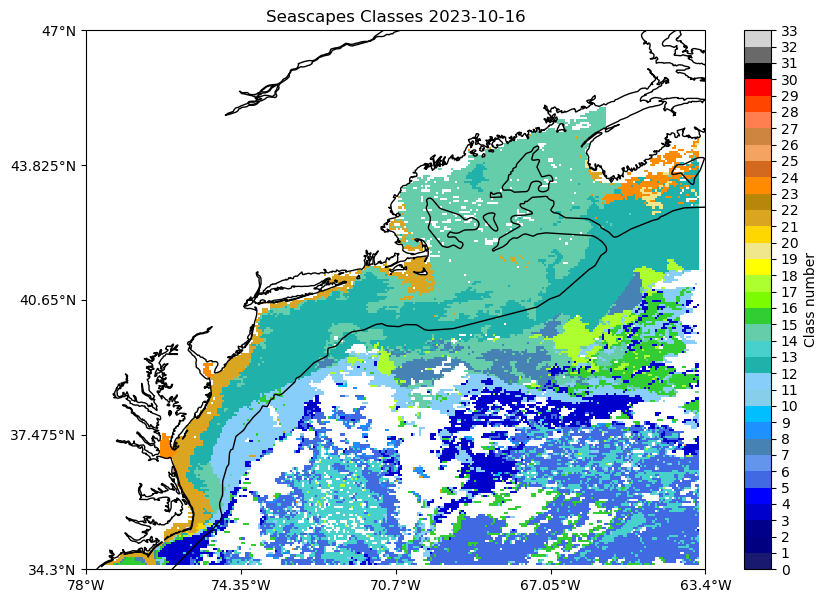

In [38]:
#plot all dates on top of each other for ONE class
from matplotlib import colors as c

start_date = '2023-04-07' #(yyyy-mm-dd format)
end_date = '2023-08-29'

#for x in range(num_files):
fig = plt.figure(figsize=(10, 7)) #set figure size
map_projection = cartopy.crs.PlateCarree() #set map projection
ax = plt.axes(projection=map_projection) 

cm = LinearSegmentedColormap.from_list('my_colors', colors, N=33) #call colormap
im = ax.pcolormesh(seascapes.longitude, seascapes.latitude,seascapes.CLASS[x,:,:], cmap = cm, vmin=0, vmax=33) #set variables to plot
ax.coastlines()
import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely.ops import cascaded_union
bathym = cfeature.NaturalEarthFeature(name='bathymetry_K_200', scale='10m', category='physical')
bathym = cascaded_union(list(bathym.geometries()))
ax.add_geometries(bathym, facecolor='none', edgecolor='black', crs=ccrs.PlateCarree())

ax.set_xticks(np.linspace(-78, -63.4, 5), crs=map_projection) #set latitude bounds 
ax.set_yticks(np.linspace(34.3, 47, 5), crs=map_projection) #set longitude bounds
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cb = plt.colorbar(im, label='Class number',) #colorbar title 
tick_locator = ticker.MaxNLocator(nbins=33) #set 33 ticks to colorbar (one for each seascape class) 
cb.locator = tick_locator
cb.update_ticks()
plt.title('Seascapes Classes ' +str(seascapes.time[x].dt.strftime('%Y-%m-%d').item()))

In [39]:
def gh_push_fname(local_dir, repo_url, branch_nm, fname, message):
    try: 
        repo = git.Repo(local_dir+proj_name) #set repo dir 
    #except: 
    #    repo = Repo.init(local_dir+proj_name) #IF NECESSARY INITIALIZE (CREATE) LOCAL DIR
    except: 
        Repo.clone_from(repo_url, local_dir+proj_name) #IF FIRST TIME RUNNING CODE, CLONE REPO
        
    with open(f"{local_dir}/{fname}", "a") as f:
        f.write("\nUpdate version 2")
    add_file = [fname]  # relative path from git root
    origin = repo.remote(name='origin')
    repo.remotes['origin'].set_url(repo_url)
    repo.head.reference = repo.create_head(branch_nm)
    repo.head.reference.set_tracking_branch(origin.refs.main).checkout()
    repo.index.add(add_file)
    repo.index.commit(message)
    repo.git.push(origin, branch_nm)

In [46]:
from git import Repo
local_dir= os.getcwd()
repo_url = "git@github.com:hsynan/NESCAPES_TEST.git" #REPO URL FROM GITHUB
proj_name = r'\SEASCAPES'
branch_nm = 'caroline'
fname = ipynbname.name()
message = 'initial push of monthly_clima to repo'
gh_push_fname(local_dir, repo_url, branch_nm, fname, message)

UnboundLocalError: cannot access local variable 'repo' where it is not associated with a value

In [44]:
os.getcwd()

'C:\\users\\caroline.OHagan\\Documents\\INTERN_PROJECT_2024\\DATA\\SEASCAPES'